<center><font color="#e30b5d"><h1>Question 7</h1></font></center>

In [1]:
# Machine Learning
import numpy                    as np
import pandas                   as pd
import matplotlib.pyplot        as plt

from mlxtend.evaluate           import bias_variance_decomp
from matplotlib.colors          import ListedColormap
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import PolynomialFeatures
from sklearn.metrics            import mean_squared_error
from sklearn.linear_model       import LinearRegression
from sklearn.pipeline           import make_pipeline

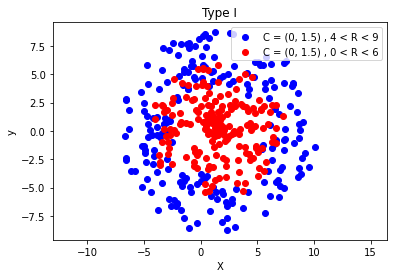

In [2]:
radius_1    = 4
radius_2    = 9
center_x    = 1.5
center_y    = 0
theta       = np.random.uniform(low = 0       , high = 2*np.pi , size = (200, 1))
radius      = np.random.uniform(low = radius_1, high = radius_2, size = (200, 1))
X1          = center_x + radius * np.cos(theta)
y1          = center_y + radius * np.sin(theta)
df_1        = pd.DataFrame(np.c_[X1.reshape(-1, 1), y1.reshape(-1, 1)], columns = ['X0', 'X1'])

radius_1    = 0
radius_2    = 6
center_x    = 1.5
center_y    = 0
theta       = np.random.uniform(low = 0       , high = 2*np.pi , size = (200, 1))
radius      = np.random.uniform(low = radius_1, high = radius_2, size = (200, 1))
X2          = center_x + radius * np.cos(theta)
y2          = center_y + radius * np.sin(theta)
df_2        = pd.DataFrame(np.c_[X2.reshape(-1, 1), y2.reshape(-1, 1)], columns = ['X0', 'X1'])

plt.scatter(X1  , y1, c = 'b', label = 'C = (0, 1.5) , 4 < R < 9')
plt.scatter(X2, y2, c = 'r', label = 'C = (0, 1.5) , 0 < R < 6')
plt.title('Type I')
plt.axis('equal')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

<center><img src="NormalDistribuation.png" width="600" height="240" align="center"/></center>

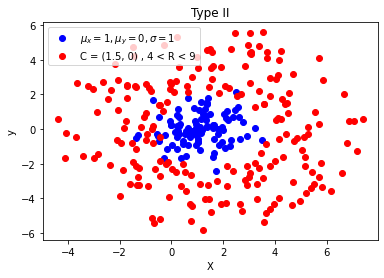

In [3]:
sigma   = 1
mu_x    = 1
mu_y    = 0

X3      = np.random.normal(mu_x, sigma, 100)
y3      = np.random.normal(mu_y, sigma, 100)
df_3    = pd.DataFrame(np.c_[X3.reshape(-1, 1), y3.reshape(-1, 1)], columns = ['X0', 'X1'])

radius_1    = 2
radius_2    = 6
center_x    = 1.5
center_y    = 0
theta       = np.random.uniform(low = 0       , high = 2*np.pi , size = (200, 1))
radius      = np.random.uniform(low = radius_1, high = radius_2, size = (200, 1))
X4          = center_x + radius * np.cos(theta)
y4          = center_y + radius * np.sin(theta)
df_4        = pd.DataFrame(np.c_[X4.reshape(-1, 1), y4.reshape(-1, 1)], columns = ['X0', 'X1'])

plt.scatter(X3, y3, c = 'b', label = f'$\mu_x = {mu_x} , \mu_y = {mu_y} , \sigma = {sigma}$')
plt.scatter(X4, y4, c = 'r', label = 'C = (1.5, 0) , 4 < R < 9')
plt.title('Type II')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
df_a = pd.concat([df_1, df_2])
df_b = pd.concat([df_3, df_4])

In [5]:
df_a['Label']     = 0
df_a.iloc[:200, df_a.columns == 'Label'] = 1

df_b['Label']     = 0
df_b.iloc[200:, df_a.columns == 'Label'] = 1

<center><font color="#00EEEE" size = "5pt"><h1>Logistic Regression without packages</h1></font></center>

In [6]:
def shuffle(x , y):
    tmp = np.array(range(len(y)))
    np.random.shuffle(tmp)
    return x[tmp] , y[tmp]

def shuffle_and_split(x , y , train_size = 0.7):
    tmp = np.array(range(len(y)))
    np.random.shuffle(tmp)
    train_len = int(len(tmp) * train_size)
    X = x[tmp]
    Y = y[tmp]
    return X[:train_len] , X[train_len:] , Y[:train_len] , Y[train_len:]

In [7]:
df_a.shape

(400, 3)

In [8]:
X1 = df_a.iloc[:, [0, 1]]
y1 = df_a.iloc[:, 2]

X2 = df_b.iloc[:, [0, 1]]
y2 = df_b.iloc[:, 2]

X1_train , X1_test , y1_train , y1_test = shuffle_and_split(X1.values,y1.values)

X2_train , X2_test , y2_train , y2_test = shuffle_and_split(X2.values,y2.values)

In [9]:
import numpy as np

class LogisticRegression():
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_param=0.01):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.lambda_param = lambda_param
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.lambda_param / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)
    
    ## Sigmoid function
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [10]:
def mapping(src_features : int, des_dim : int) -> float:
    iteration   = 0
    pow_n       = 2
    power       = np.array(range(pow_n))
    d           = pd.DataFrame(np.zeros((src_features.shape[0], des_dim)), columns = [f'X{i}' for i in range(des_dim)])

    while iteration < des_dim:
        power_1   = np.array(range(pow_n))
        power_2   = np.array(list(reversed(range(pow_n))))
        for i, j in zip(power_2, power_1):
            d.iloc[:, iteration] = (src_features.iloc[:, 0]**i) * (src_features.iloc[:, 1]**j)
            iteration += 1
            if iteration > des_dim:
                break
        pow_n += 1
    return d

In [11]:
X1_mapping_train    = mapping(pd.DataFrame(X1_train), 5)
X1_mapping_test     = mapping(pd.DataFrame(X1_test),5)

X2_mapping_train    = mapping(pd.DataFrame(X2_train), 5)
X2_mapping_test     = mapping(pd.DataFrame(X2_test),5)

In [12]:
# Create logistic regression model with L2 regularization
model               = LogisticRegression(learning_rate=0.01,lambda_param=0.1)

# Fit model to training data
model.fit(X1_mapping_train, y1_train)

# Predict on test data
y1_pred             = model.predict(X1_mapping_test)

np.unique(y1_train == y1_pred , return_counts=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3868\1489384311.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.unique(y1_train == y1_pred , return_counts=True)


(array([False]), array([1], dtype=int64))

In [13]:
x       = np.linspace(-9 , 12 , 500)
y       = np.linspace(-9 , 12 , 500)
xx , yy = np.meshgrid(x , y)
mesh    = np.array([xx.ravel(), yy.ravel()])

In [14]:
X1_test         = mesh.T
X1_mapping_test = mapping(pd.DataFrame(X1_test), 5)
y1_pred         = model.predict(X1_mapping_test)

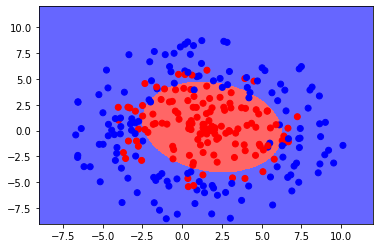

In [15]:
plt.pcolormesh(xx , yy , y1_pred.reshape(xx.shape),alpha = 0.6, cmap = ListedColormap(['r', 'b']))
plt.scatter(*X1_train.T , c = y1_train , cmap = ListedColormap(['r', 'b']))
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3868\722171241.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.unique(y2_train == y2_pred , return_counts=True)


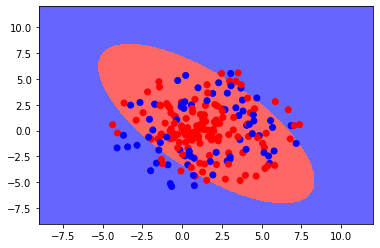

In [16]:
# Create logistic regression model with L2 regularization
model               = LogisticRegression(learning_rate=0.01,lambda_param=0.1)

# Fit model to training data
model.fit(X2_mapping_train, y2_train)

# Predict on test data
y2_pred             = model.predict(X2_mapping_test)

np.unique(y2_train == y2_pred , return_counts=True)

x       = np.linspace(-9 , 12 , 500)
y       = np.linspace(-9 , 12 , 500)
xx , yy = np.meshgrid(x , y)
mesh    = np.array([xx.ravel(), yy.ravel()])

X2_test         = mesh.T
X2_mapping_test = mapping(pd.DataFrame(X2_test), 5)
y2_pred         = model.predict(X2_mapping_test)

plt.pcolormesh(xx , yy , y2_pred.reshape(xx.shape),alpha = 0.6, cmap = ListedColormap(['r', 'b']))
plt.scatter(*X2_train.T , c = y2_train , cmap = ListedColormap(['r', 'b']))
plt.show()